In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [3]:
# periksa informasi df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#periksa informasi df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## EDA

<AxesSubplot:>

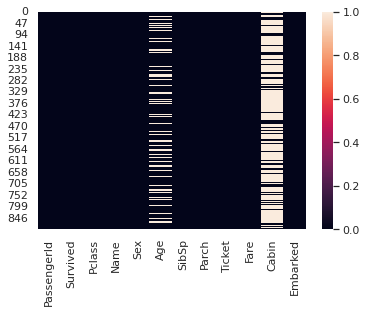

In [5]:
# mencari data yang hilang
sns.heatmap(df_train.isnull())

<AxesSubplot:>

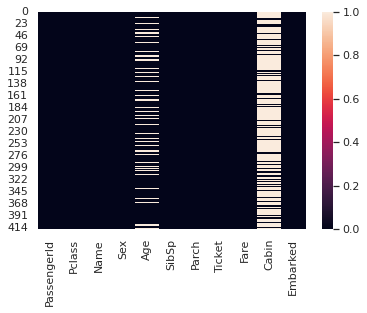

In [6]:
sns.heatmap(df_test.isnull())

/home/amsopian/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

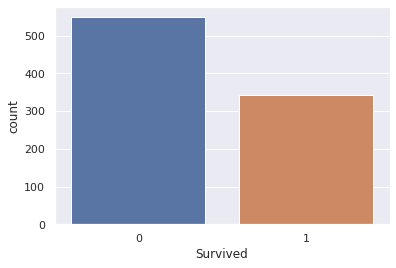

In [7]:
sns.countplot(df_train['Survived'])

Ada sekitar 62% yang tidak selamat dan 48% tamu yang selamat dalam kecelakaan tersebut

<AxesSubplot:xlabel='Survived', ylabel='count'>

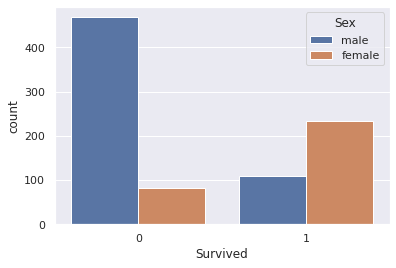

In [8]:
sns.countplot(x='Survived', data=df_train, hue='Sex')

Dapat terlihat bahwa banyak penumpang yang meninggal adalah laki - laki dan yang selamat paling banyak adalah perempuan.

<AxesSubplot:xlabel='Survived', ylabel='count'>

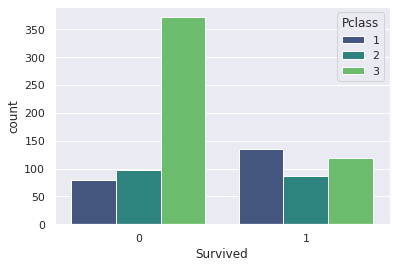

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='viridis')

Pelanggan kelas 1 adalah paling banyak yang selamat, karena pelanggan ini tentunya memiliki prioritas keselamatan. Insiden meninggal terbanyak di kelas 3. 

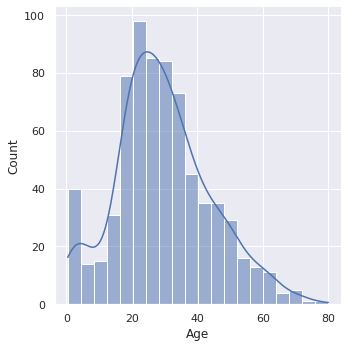

In [10]:
sns.displot(df_train['Age'].dropna(), kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

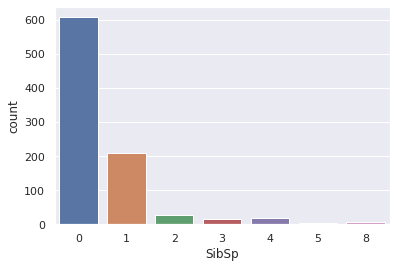

In [11]:
sns.countplot(x = 'SibSp', data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

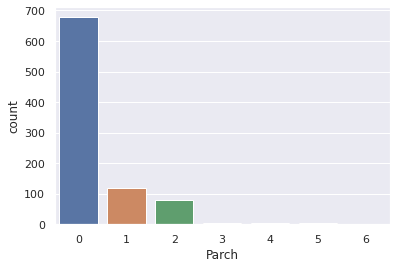

In [12]:
sns.countplot(x = 'Parch', data=df_train)

In [13]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

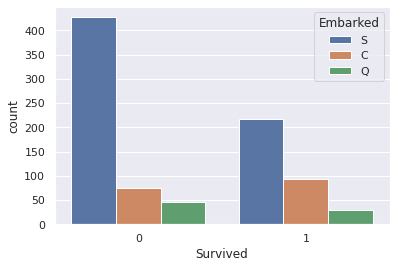

In [14]:
sns.countplot(x = 'Survived', hue='Embarked', data=df_train)

In [15]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Menangani data yang hilang

In [16]:
print(round(df_train['Age'].mean()))
print(round(df_test['Age'].mean()))

30
30


In [17]:
df_train['Age'] = df_train['Age'].fillna(round(df_train['Age'].mean()))
df_test['Age'] = df_test['Age'].fillna(round(df_test['Age'].mean()))
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
# drop baris cabin karena banyak sekali data yang hilang
df_train.drop('Cabin',axis=1, inplace=True)

In [19]:
df_test.drop('Cabin',axis=1, inplace=True)

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
df_train.dropna(inplace=True)

In [25]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df_test.dropna(inplace=True)
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Konversi data kategorik

In [46]:
train = df_train.copy()
test = df_test.copy()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


In [48]:
# drop passenger, tiket, dan name
train.drop(['PassengerId','Ticket','Name'],axis=1, inplace=True)
test.drop(['PassengerId','Ticket','Name'],axis=1, inplace=True)

In [49]:
# ubah type 'Pclass' menjadi object. 
# untuk memudahkan mendapatkan variabel dummy
train['Pclass'] = train['Pclass'].astype(object)
test['Pclass'] = train['Pclass'].astype(object)

In [52]:
# buat data dummy untuk semua variabel ber-type object
# dalam mesin learning komputer hanya mampu membaca nilai 0 atau 1
# oleh sebab itu penting menjadikan data object ke dalam dummies
train = pd.get_dummies(train, drop_first=True)

In [53]:
test = pd.get_dummies(test, drop_first=True)

In [54]:
# kolom object sekarang hanya bernilai 0 dan 1.
# 0 menunjukan bahwa kondisi tidak terjadi atau lainnya
# 1 menunjukan kondisi tersebut benar
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [55]:
# Pclass_2 = 1 :jika pelanggan berada dikelas kedua
# Pclass_3 = 1 :jika pelanggan berada dikelas ketiga
# Pclass 2 & P_class_3 = 0 : pelanggan berada di kelas pertama

## Logistik Regression Model

In [56]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test

In [59]:
from sklearn.linear_model import LogisticRegression

In [159]:
logmodel = LogisticRegression(solver='sag',random_state=210, max_iter=5000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=210, solver='sag')

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [161]:
prediksi = logmodel.predict(X_train)

In [162]:
# Menghasilkan evaluasi model
from sklearn import metrics
print("Akurasi :", metrics.accuracy_score(y_train, logmodel.predict(X_train)))
print("AUC :", metrics.roc_auc_score(y_train, logmodel.predict_proba(X_train)[:,1]))
print("Confussion Metrics :", metrics.confusion_matrix(y_train, logmodel.predict(X_train)))
print("Laporan Klasifikasi :", metrics.classification_report(y_train, logmodel.predict(X_train)))

Akurasi : 0.8053993250843644
AUC : 0.8342119361405764
Confussion Metrics : [[496  53]
 [120 220]]
Laporan Klasifikasi :               precision    recall  f1-score   support

           0       0.81      0.90      0.85       549
           1       0.81      0.65      0.72       340

    accuracy                           0.81       889
   macro avg       0.81      0.78      0.78       889
weighted avg       0.81      0.81      0.80       889



ROC AUC 0.83


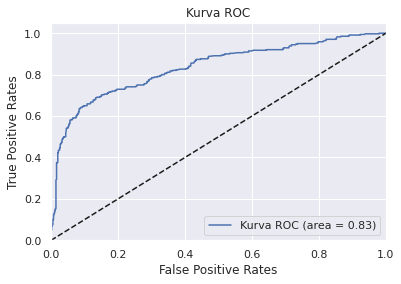

In [163]:
# menentukan false positive dan true positive
fpr,tpr, _ = metrics.roc_curve(y_train, logmodel.predict_proba(X_train)[:,1])

# menghitung ROC
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC %0.2f" % roc_auc)

# plot kurva ROC untuk spesifikasi kelas
plt.figure()
plt.plot(fpr,tpr, label='Kurva ROC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.show()

In [164]:
prediksi = logmodel.predict(X_test)

In [165]:
prediksi

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [166]:
df_test['Prediksi'] = prediksi

In [168]:
df_test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prediksi
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,0


<AxesSubplot:xlabel='Prediksi', ylabel='count'>

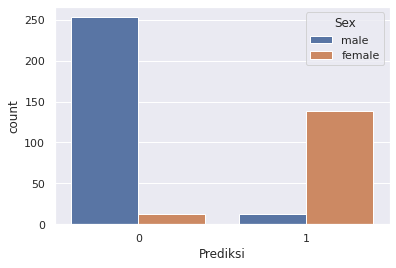

In [169]:
sns.countplot(x = 'Prediksi', data=df_test, hue='Sex')

<AxesSubplot:xlabel='Prediksi', ylabel='count'>

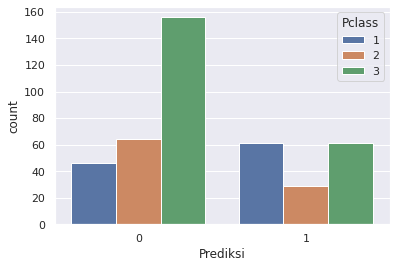

In [170]:
sns.countplot(x = 'Prediksi', data=df_test, hue='Pclass')

In [104]:
#df_prediksi.reset_index(inplace=True)

In [109]:
#df_prediksi = df_prediksi.rename(columns={'index':'Id'})

In [113]:
#df_prediksi.drop(['id'],axis=1,inplace=True)

In [115]:
#df_prediksi.to_csv('prediksi_id.csv', index=False)